In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import datetime
from networkx import NetworkXNoPath

# import custom functions
from corrmat_functions import *

# Load all networks

In [24]:
# load all networks
msts = np.load('data/msts.npy', allow_pickle='TRUE').item()  # MSTs
pmfgs = np.load('data/pmfgs.npy', allow_pickle='TRUE').item()  # PMFGs
tns = np.load("data/tns.npy", allow_pickle="TRUE").item()  # Threshold networks TNs

In [4]:
# #changing pmfgs so it has the same layout as msts and tns

# #setting tickers as node attributes for pmfgs
# for i, (k,pmfg) in enumerate(sorted(pmfgs.items())):
#     tickers = {index: stockname for index, stockname in enumerate(pmfg['ticker'])}
#     nx.set_node_attributes(pmfg['network'], tickers , 'ticker')

# #changing dictionary structure to { <timestamp> : <pmfg> }
# pmfgs = {k:v['network'] for k,v in pmfgs.items()}

In [8]:
#properties to consider
# https://www.sciencedirect.com/science/article/pii/S2214845020300521
# Nodes	Avg.Degree	Pathlength	Betweenness Centrality	Closeness Centrality	Power Law p(k) ∼ k−    

# https://link.springer.com/article/10.1007/s10614-016-9627-7
# normalized tree length  
# average path length
# mean occupation layer


#https://link.springer.com/chapter/10.1007/978-3-030-66046-8_21
# centrality measures per node compared over time
# Degree Centrality
# Node Strength
# Betweenness Centrality
# Closeness Centrality
# Eigenvector Centrality

In [10]:
test_date = '2020-05-13 01-00-00'
mst_test = msts[test_date]
msts

{'2021-09-22 01-00-00': <networkx.classes.graph.Graph at 0x1e33939b610>,
 '2021-03-24 01-00-00': <networkx.classes.graph.Graph at 0x1e33e959be0>,
 '2020-05-13 01-00-00': <networkx.classes.graph.Graph at 0x1e339396d90>,
 '2020-12-23 01-00-00': <networkx.classes.graph.Graph at 0x1e33e97d1f0>,
 '2020-07-15 01-00-00': <networkx.classes.graph.Graph at 0x1e33e97d850>,
 '2021-04-21 01-00-00': <networkx.classes.graph.Graph at 0x1e33e97dc70>,
 '2020-06-03 01-00-00': <networkx.classes.graph.Graph at 0x1e33e99c280>,
 '2020-08-05 01-00-00': <networkx.classes.graph.Graph at 0x1e33e99c6a0>,
 '2020-05-27 01-00-00': <networkx.classes.graph.Graph at 0x1e33e99cac0>,
 '2021-06-16 01-00-00': <networkx.classes.graph.Graph at 0x1e33e99cee0>,
 '2020-06-17 01-00-00': <networkx.classes.graph.Graph at 0x1e33e9be580>,
 '2021-05-19 01-00-00': <networkx.classes.graph.Graph at 0x1e33e9be9a0>,
 '2020-08-19 01-00-00': <networkx.classes.graph.Graph at 0x1e33e9e2040>,
 '2021-03-10 01-00-00': <networkx.classes.graph.Gra

In [11]:
def str_to_date(string):
    return datetime.datetime.strptime(string, "%Y-%m-%d %H-%M-%S")

# Generic function to plot metrics over time

In [12]:
def compare_networks(MSTs, PMFGs, TNs, measure, title, net_size=False):
    """
    MSTs, PMFGs and TNs are dictionaries of networks where keys are strings timestamps and values are networkx graphs.
    measure: networkx function, e.g. nx.average_shortest_path_length(G)
    Set TNs = None to only compare the graphs (MSTs and PMFGs)
    net_size: True to superimpose network size (i.e. nr of nodes)
    title: title of the plot
    returns a plot
    """
    dates_strings = sorted(msts.keys())
    dates = [str_to_date(i) for i in dates_strings]

    few_data = ["2020-09-30 01-00-00", "2020-10-07 01-00-00"]

    # compute measures for all graphs
    m_msts = []
    m_pmfgs = []
    m_tns = []
    for t in dates_strings:
        if t in few_data:
            m_msts.append(np.nan)
            m_pmfgs.append(np.nan)
            m_tns.append(np.nan)
        else:
            m_msts.append(measure(MSTs[t]))
            m_pmfgs.append(measure(PMFGs[t]))
            if TNs is not None:
                m_tns.append(measure(TNs[t]))

    # plot parameters
    fs = 12  # fontsize

    # plot measures
    fig, ax = plt.subplots(1,1, figsize=(12,8), constrained_layout=True)
    ax.plot(dates, m_msts, label="MST")
    ax.plot(dates, m_pmfgs, label="PMFG")
    if TNs is not None:
        ax.plot(dates, m_tns, label="TN")
    
    # superimpose network size
    if net_size:
        net_size_ = [MSTs[t].number_of_nodes() for t in dates_strings]
        ax.plot(dates, net_size_, label="Network Size", color="purple", linestyle="--")

    # mark important dates in the figure

    # too few data available
    # few_data = [str_to_date("2020-09-30 01-00-00"), str_to_date("2020-10-07 01-00-00")]
    # ax.axvspan(few_data[0], few_data[1], color='gray', alpha=0.3, lw=0, label="too few data points")

    # stock market crash (dates according to wikipedia: https://en.wikipedia.org/wiki/2020_stock_market_crash)
    crash = [datetime.date(2020, 2, 20), datetime.date(2020, 7, 4)]
    ax.axvspan(crash[0], crash[1], color='red', alpha=0.3, lw=0, label="stock market crash")

    ax.legend(fontsize=fs)
    fig.suptitle(title, fontsize=fs+8)
    fig.savefig(f"figures/metrics_{title}.png")

## Degree related metrics
- Max Degree
- Average Degree
- Density
- Assortativity
- Nearest Neighbor Degree

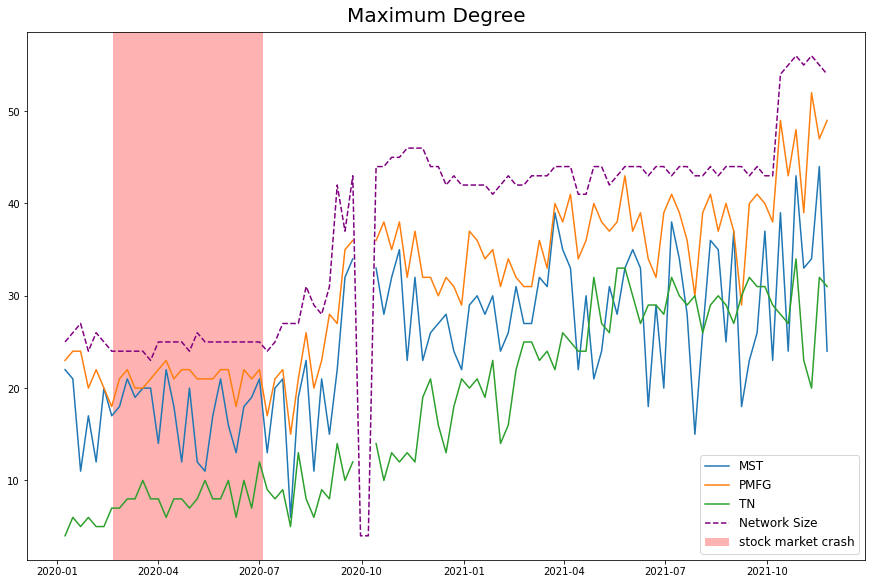

In [13]:
max_deg = lambda G: np.max([j for i,j in G.degree()])
compare_networks(msts, pmfgs, tns, max_deg, "Maximum Degree", True)

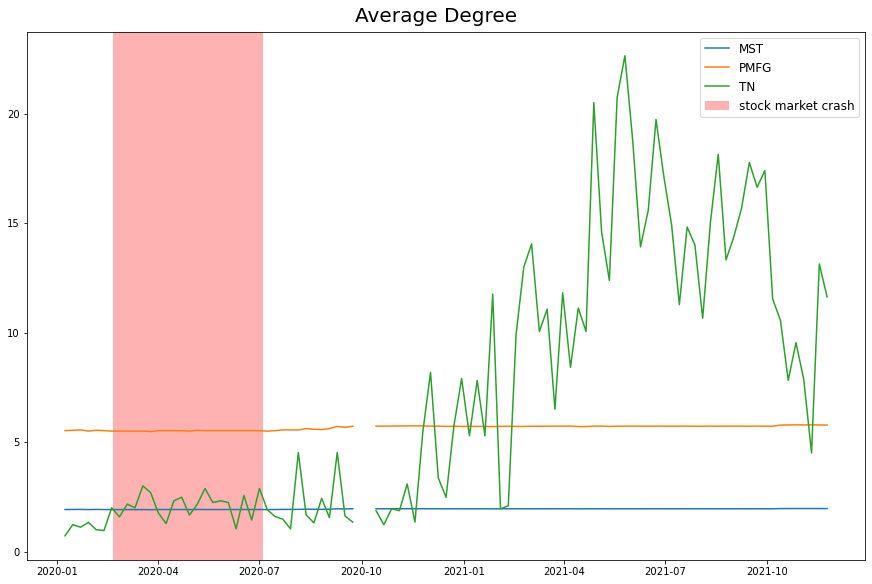

In [14]:
avg_deg = lambda G: np.mean([j for i,j in G.degree()])
compare_networks(msts, pmfgs, tns, avg_deg, "Average Degree")

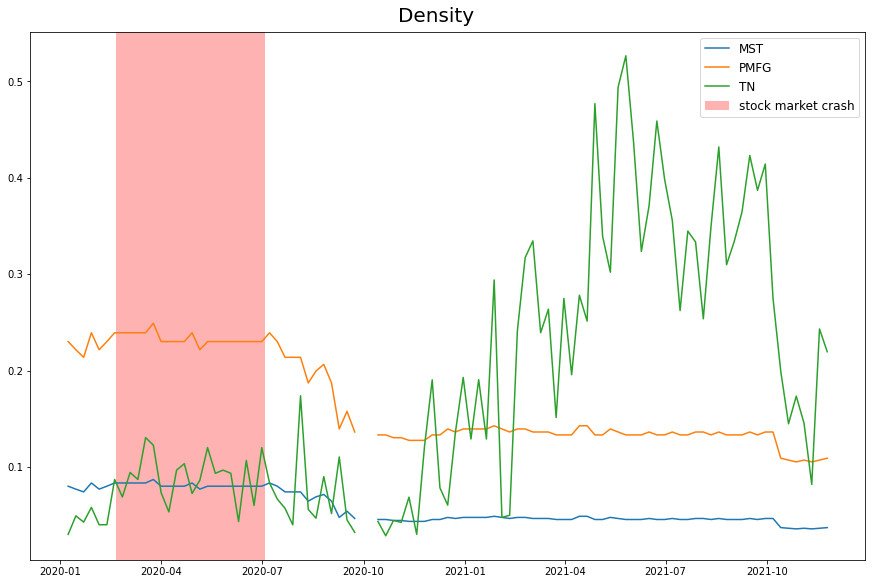

In [15]:
compare_networks(msts, pmfgs, tns, nx.density, "Density", False)

C:\Users\Lorenzo\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


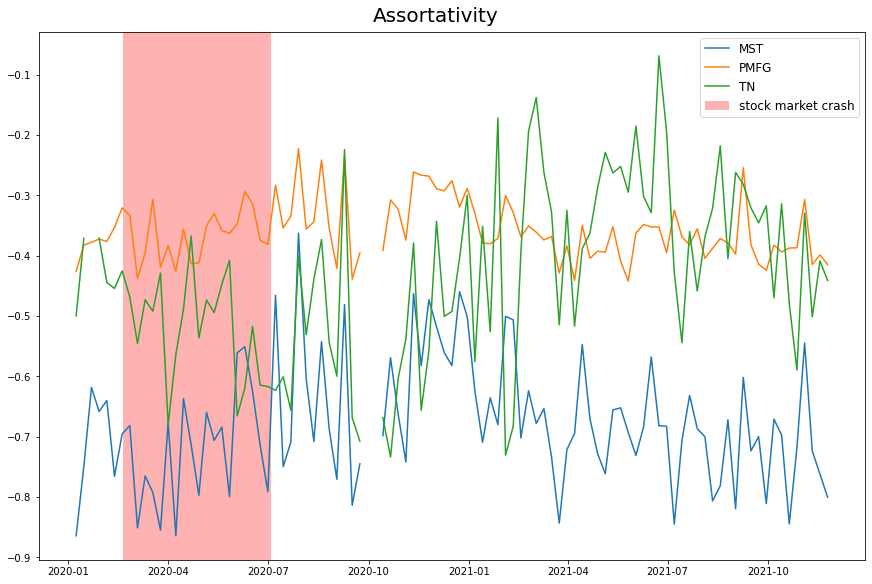

In [16]:
compare_networks(msts, pmfgs, tns, nx.degree_assortativity_coefficient, "Assortativity", False)

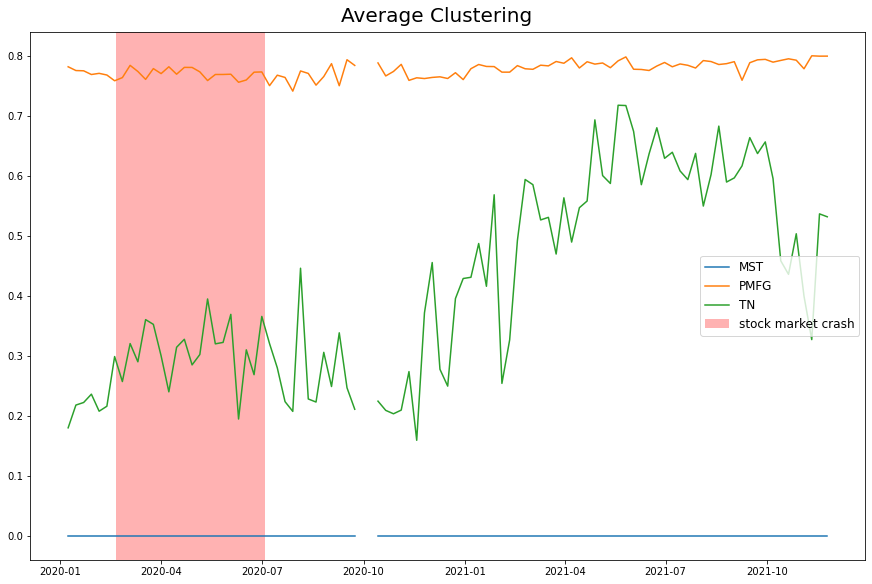

In [17]:
compare_networks(msts, pmfgs, tns, nx.average_clustering, "Average Clustering", False)

## Distance Based
- Average Distance
- Diameter

In [18]:
def distance(G):
    """returns a matrix of the pairwise distances. If no path, then set to infinity."""
    # A = nx.to_numpy_array(G)
    # print(A)

    nodes = list(G.nodes())
    N = len(nodes)

    # initialize all distances as inf
    d = np.full((N, N), np.inf)

    # compute every pairwise distance (inf if not connected)
    for i, j_dict in nx.all_pairs_shortest_path_length(G):
        for j in j_dict.keys():
            d[i,j] = j_dict[j]

    return d


def inf_diameter(G):
    """return maximum distance that is not infinity."""
    d = distance(G)

    # get max of non inf values
    m = np.amax(d, where=~np.isinf(d), initial=0)
    return m


def avg_distance(G):
    d = distance(G)

    avg_d = np.mean(d, where=~np.isinf(d))
    return avg_d


distance(mst_test)

array([[0., 1., 2., 3., 4., 2., 3., 3., 2., 3., 2., 2., 2., 2., 4., 3.,
        3., 2., 3., 3., 3., 2., 4., 2., 4.],
       [1., 0., 1., 2., 3., 1., 2., 2., 1., 2., 1., 1., 1., 1., 3., 2.,
        2., 1., 2., 2., 2., 1., 3., 1., 3.],
       [2., 1., 0., 3., 4., 2., 3., 3., 2., 3., 2., 2., 2., 2., 4., 3.,
        3., 2., 3., 3., 3., 2., 4., 2., 4.],
       [3., 2., 3., 0., 3., 1., 2., 2., 3., 2., 3., 3., 3., 3., 3., 2.,
        2., 3., 2., 2., 2., 3., 3., 3., 3.],
       [4., 3., 4., 3., 0., 2., 3., 3., 4., 1., 4., 4., 4., 4., 4., 3.,
        3., 4., 3., 3., 3., 4., 2., 4., 2.],
       [2., 1., 2., 1., 2., 0., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1.,
        1., 2., 1., 1., 1., 2., 2., 2., 2.],
       [3., 2., 3., 2., 3., 1., 0., 2., 3., 2., 3., 3., 3., 3., 3., 2.,
        2., 3., 2., 2., 2., 3., 3., 3., 3.],
       [3., 2., 3., 2., 3., 1., 2., 0., 3., 2., 3., 3., 3., 3., 3., 2.,
        2., 3., 2., 2., 2., 3., 3., 3., 3.],
       [2., 1., 2., 3., 4., 2., 3., 3., 0., 3., 2., 2., 2., 2., 

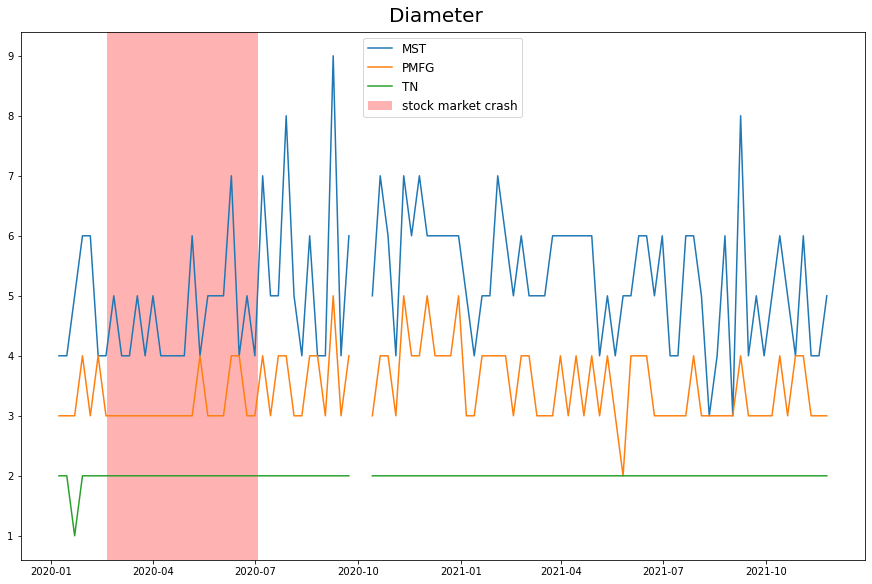

In [19]:
compare_networks(msts, pmfgs, tns, inf_diameter, "Diameter", False)

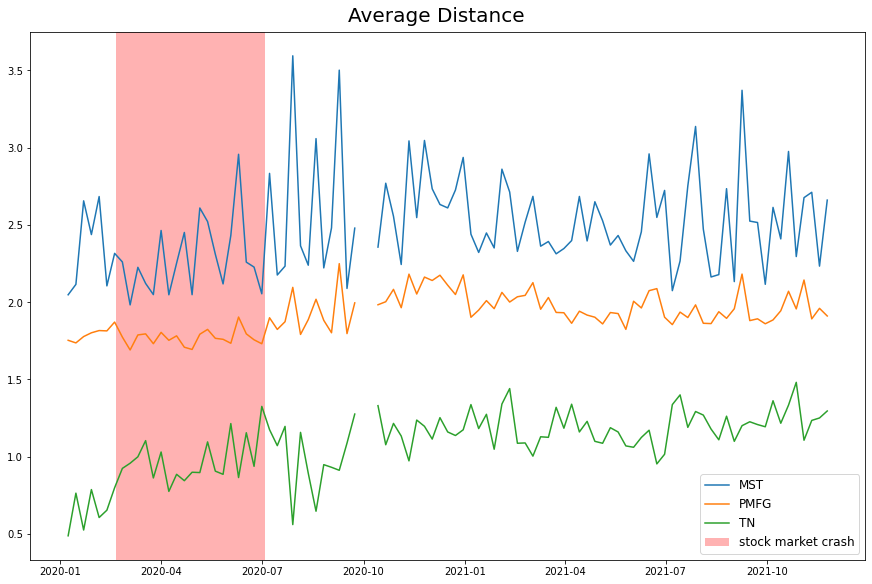

In [20]:
compare_networks(msts, pmfgs, tns, avg_distance, "Average Distance", False)

## Average Clustering

## Centrality
- average betweenness 
- average closeness

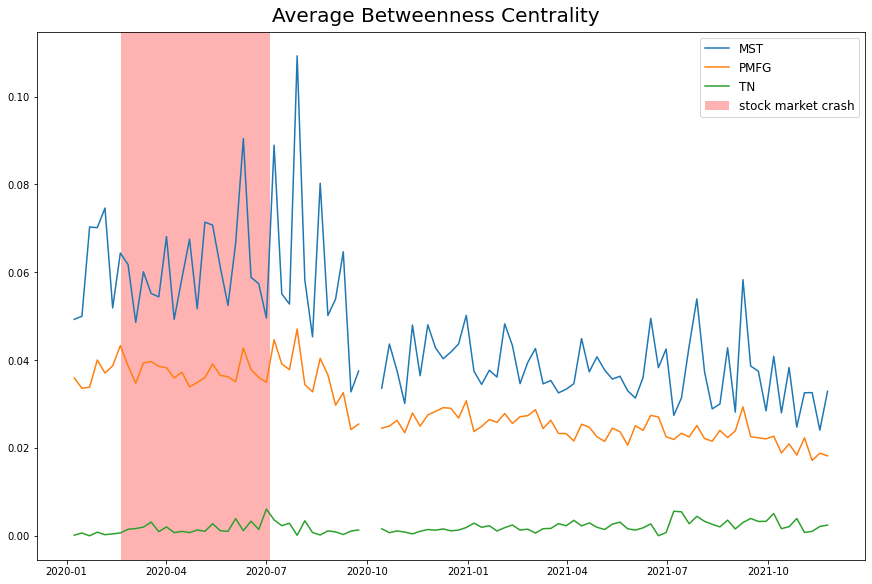

In [21]:
avg_between = lambda G: np.mean(list(nx.betweenness_centrality(G).values()))
compare_networks(msts, pmfgs, tns, avg_between, "Average Betweenness Centrality", False)

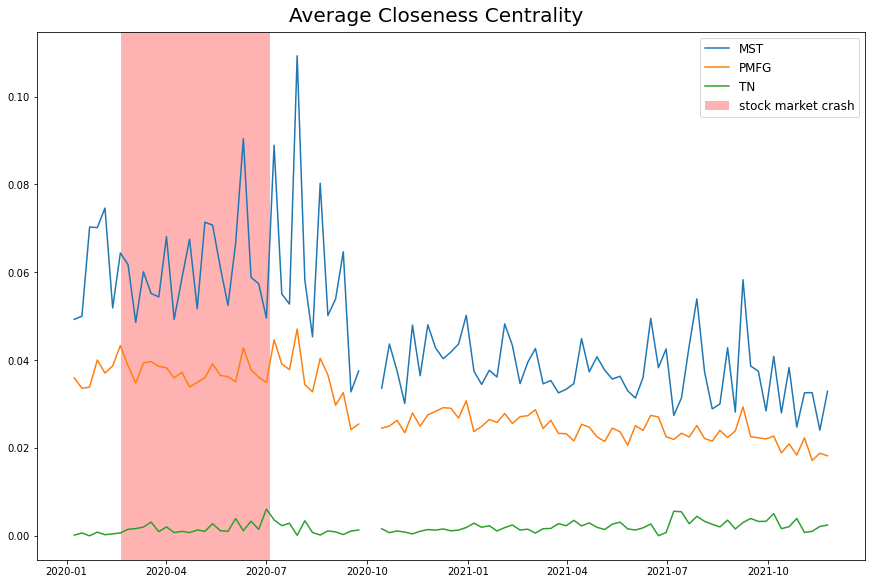

In [22]:
avg_closeness = lambda G: np.mean(list(nx.closeness_centrality(G).values()))
compare_networks(msts, pmfgs, tns, avg_between, "Average Closeness Centrality", False)

## Mean Occupation Layer

In [93]:
def mean_occupation_layer(G):
    N = mst.number_of_nodes()
    
    #get the node with max degree
    max_degree_id = max(dict(G.degree()), key=dict(G.degree()).get)

    #shortest path length from source (which is node whith highest degree) and all other nodes
    level_to_central = nx.single_source_shortest_path_length(G, max_degree_id).values()

    return (1/N) * sum(level_to_central)

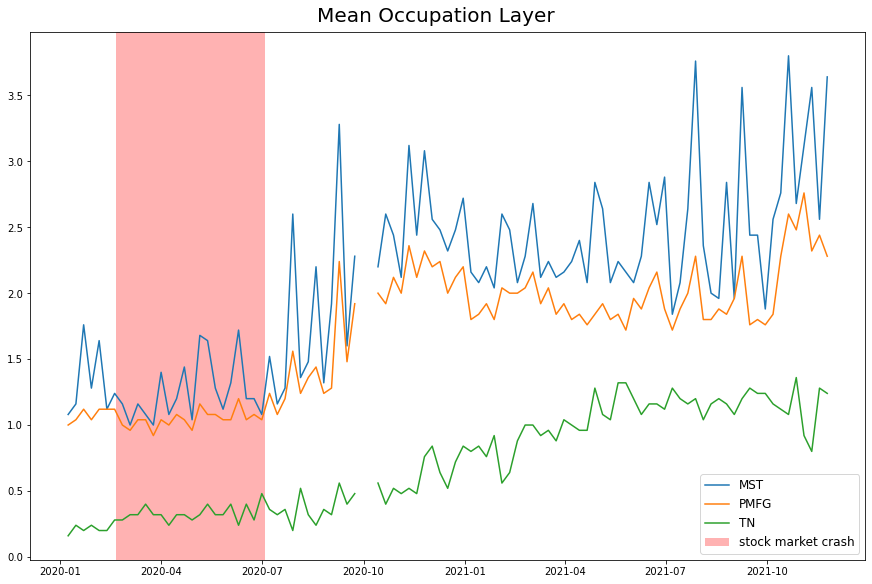

In [94]:
compare_networks(msts, pmfgs, tns, mean_occupation_layer, "Mean Occupation Layer", False)

## Network Centrality Heatmaps

In [86]:
# takes dicionary as input with this structure
# { <timestamp> : <network> }
# it returns a dictionary with centralities at each timestamp
# centralities are saves ad a dictionary with each ticker as key
# {  <timestamp> : 
#           {
#               'degree_centrality' : 
#                       {
#                           'BTC' : <value>,
#                           'ETH' : <value>,  
#                              ..... 
#                       }
#               'betweenness_centrality' : 
#                       {
#                           'BTC' : <value>,
#                           'ETH' : <value>,  
#                              ..... 
#                       }
#                  ........
#           }
# }



def get_network_node_centralities(network_dict):

    network_properties = {}

    for k,G in sorted(network_dict.items()):
        properties = {}

        properties['nodes'] = G.number_of_nodes()
        properties['degree_centrality'] = dict(zip(nx.get_node_attributes(G,'ticker').values(), nx.degree_centrality(G).values()))
        properties['betweenness_centrality'] = dict(zip(nx.get_node_attributes(G,'ticker').values(), nx.betweenness_centrality(G).values()))
        properties['closeness_centrality'] =  dict(zip(nx.get_node_attributes(G,'ticker').values(), nx.closeness_centrality(G).values()))
        properties['eigenvector_centrality'] = dict(zip(nx.get_node_attributes(G,'ticker').values(), nx.eigenvector_centrality(G).values()))


        network_properties[k] = properties

    return network_properties


In [87]:
#takes dictionary generated by get_network_node_centralities() (see above for structure) and the centrality measure we want as string
#for example : get_centrality_df(msts_node_centralities, 'degree_centrality')
#and returns a pandas dataframe where rows are tickers and columns are timestamps with that centrality as the values

def get_centrality_df(node_centralites, centrality):
    tickers = load_corrmat_tickers()
    centralities = {}

    for timestamp,v in node_centralites.items():
        centralities[timestamp] = {}
        for ticker in tickers:
            if ticker in v[centrality].keys():
                centralities[timestamp][ticker] = v[centrality][ticker]
            else:
                centralities[timestamp][ticker] = 0

    return pd.DataFrame.from_dict(centralities)


In [90]:
def plot_centrality_heatmaps(networks_list, names):
    for i, networks in enumerate(networks_list):

        node_centralities = get_network_node_centralities(networks)

        fig, axs = plt.subplots(4, figsize=(22,50) , constrained_layout=True)
        sns.heatmap(get_centrality_df(node_centralities, 'degree_centrality'), ax=axs[0])
        axs[0].set_title('degree_centralities')
        sns.heatmap(get_centrality_df(node_centralities, 'betweenness_centrality'), ax=axs[1])
        axs[1].set_title('betweenness_centrality')
        sns.heatmap(get_centrality_df(node_centralities, 'closeness_centrality'), ax=axs[2])
        axs[2].set_title('closeness_centrality')
        sns.heatmap(get_centrality_df(node_centralities, 'eigenvector_centrality'), ax=axs[3])
        axs[3].set_title('eigenvector_centrality')
        fig.suptitle("" + names[i] + " centralities over time", fontsize=25)

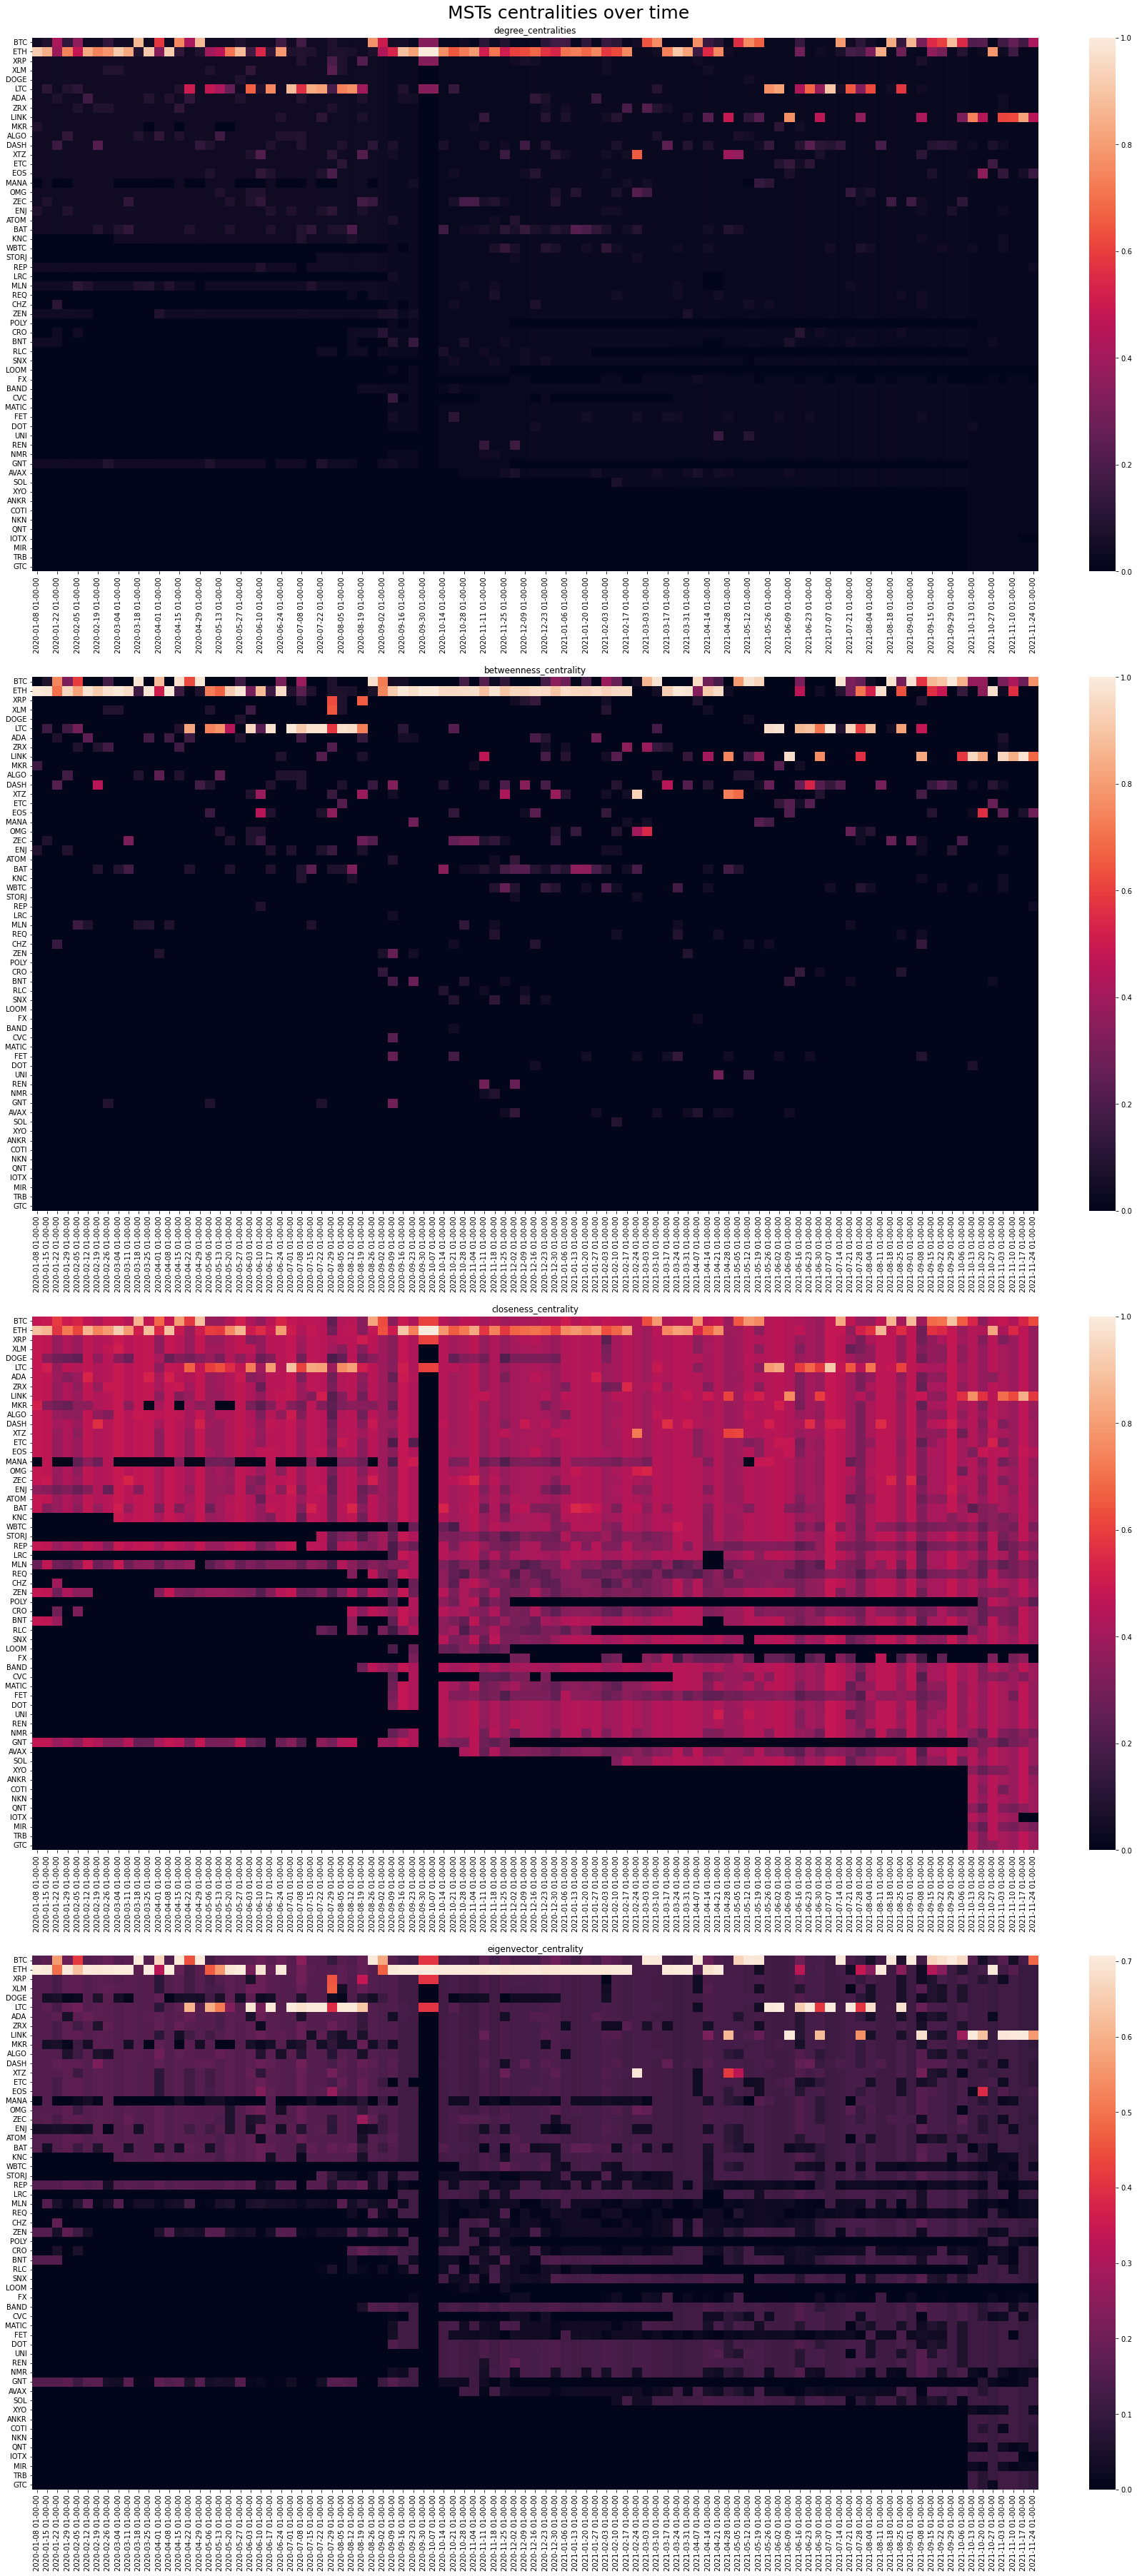

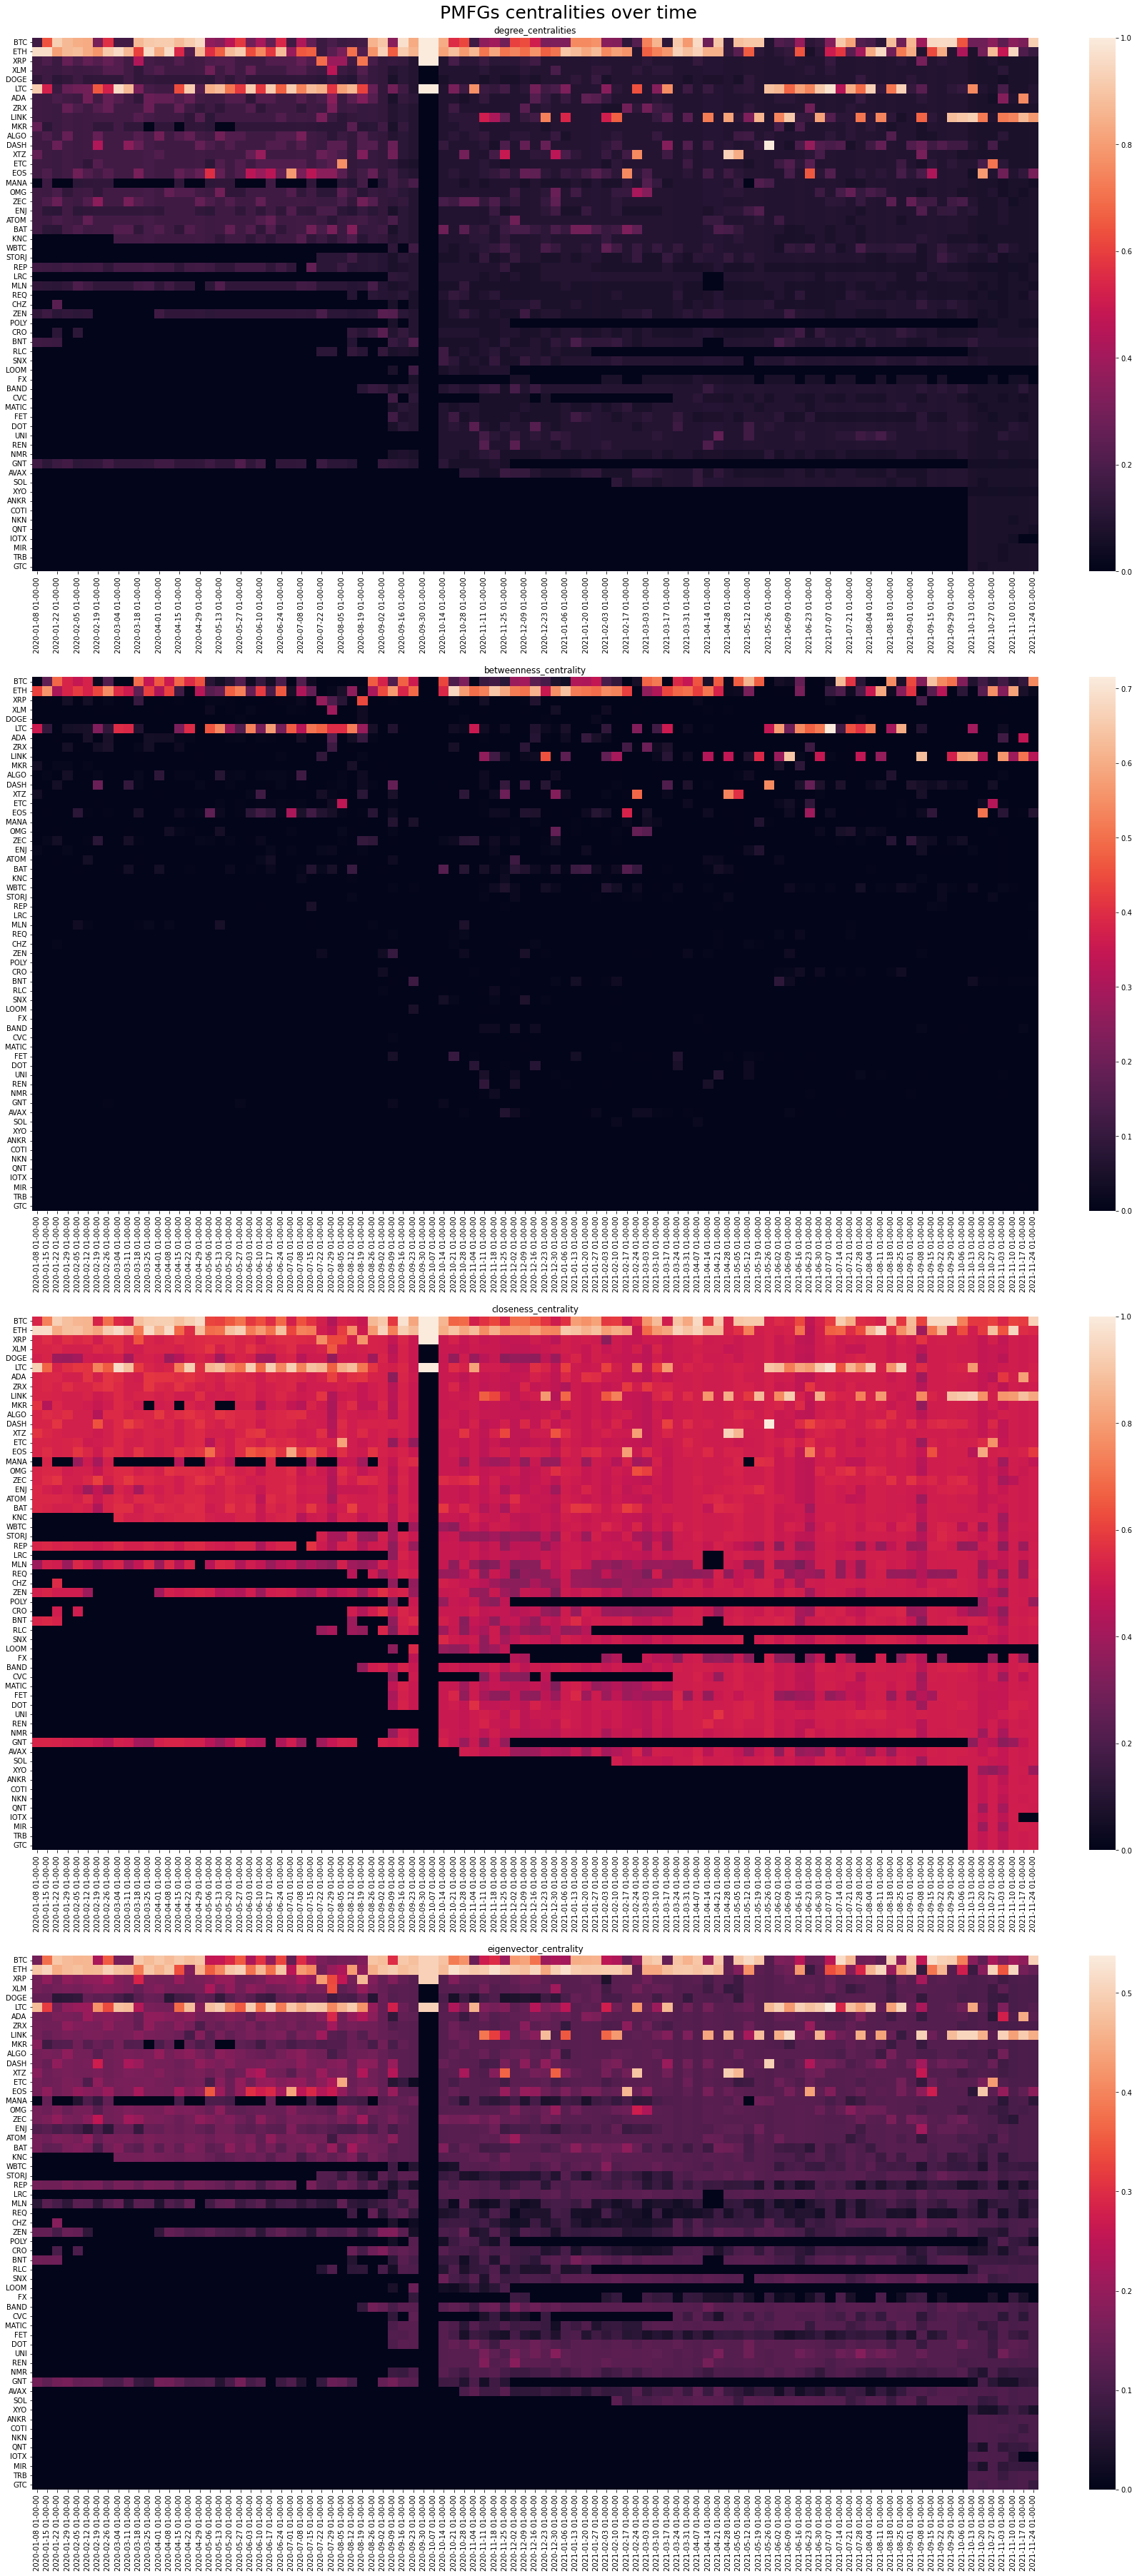

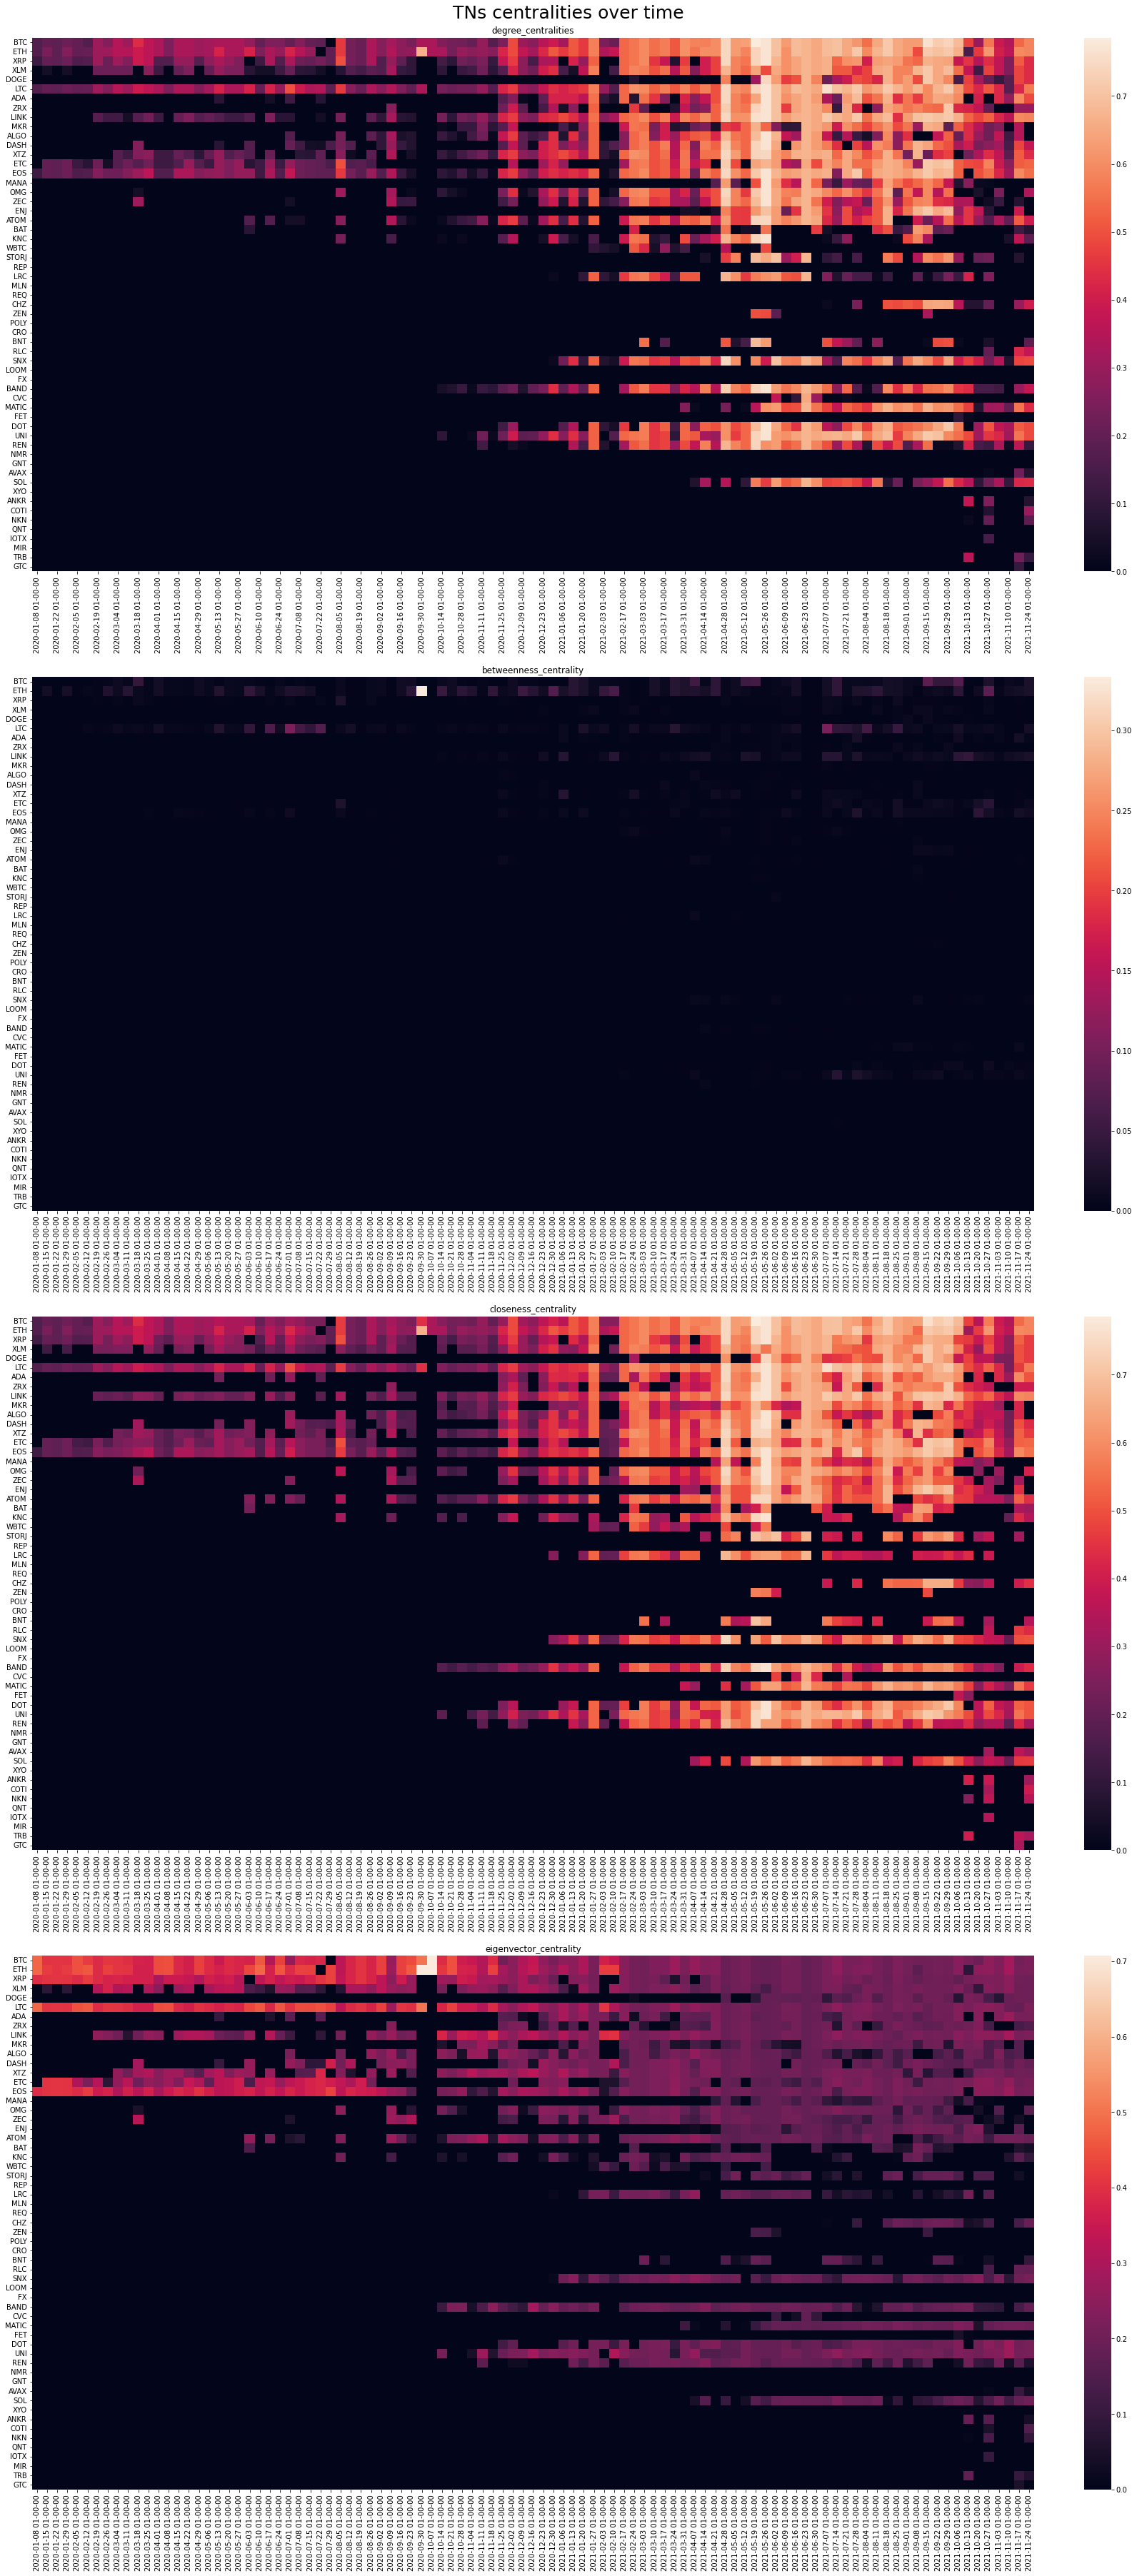

In [92]:
plot_centrality_heatmaps([msts,pmfgs,tns], ["MSTs", "PMFGs", "TNs"])

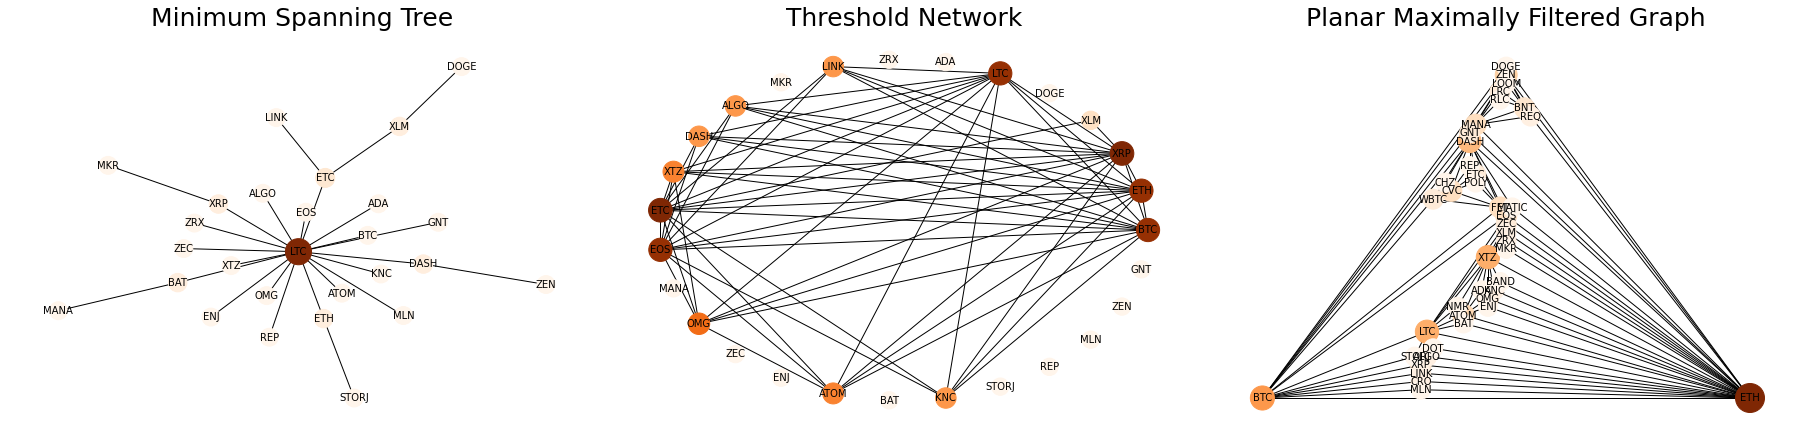

In [ ]:
test_date = '2020-08-05 01-00-00'
networks = np.array([msts, tns, pmfgs])
fig, axs = plt.subplots(1, 3, figsize = (25, 6), constrained_layout = True)
pos_list = [nx.kamada_kawai_layout, nx.circular_layout, nx.planar_layout]
title_list = ['Minimum Spanning Tree', 'Threshold Network', 'Planar Maximally Filtered Graph']
for i in range(3):
    if i == 2:
        test_date = '2020-09-09 01-00-00'
    mst = networks[i][test_date]
    node_color = [nx.degree(mst)[n] for n in nx.nodes(mst)]
    node_size = [300 + nx.degree(mst)[n] * 20 for n in nx.nodes(mst)]
    pos= pos_list[i](mst)
    nx.draw(mst, pos, ax = axs[i], node_color=node_color, cmap='Oranges', labels=nx.get_node_attributes(mst, 'ticker'), with_labels=True, node_size=node_size, font_size=10)
    axs[i].set_title(title_list[i], fontsize = 25)